In [16]:
import torch
import torchvision
import torchvision.transforms as transforms
from channel_engineering import lab_to_rgb, rgb_to_lab
import matplotlib.pyplot as plt
import numpy as np

In [65]:
interesting_indexes = [4161]

# Load the CIFAR-10 
transform = transforms.Compose([transforms.ToTensor()]) 
dataset = torchvision.datasets.Caltech101(root="./data", download=True, transform=transform)
idx = np.random.randint(len(dataset))
images = dataset[idx][0].unsqueeze(0)
print("index of img", idx)



Files already downloaded and verified
index of img 5936


In [73]:
import numpy as np
import torch
from PIL import Image

image = Image.open("./foxHQ.jpeg").convert("RGB")
image_np = np.array(image)
print(f"Original shape: {image_np.shape}")  # Should be (H, W, 3)
image_np_normalized = image_np / 255.0  # Normalize to [0, 1]
image_tensor = torch.tensor(image_np_normalized, dtype=torch.float32).permute(2, 0, 1)
print(f"Normalized tensor shape: {image_tensor.shape}")  # Should be (3, H, W)
images = image_tensor.unsqueeze(0)


Original shape: (1997, 3000, 3)
Normalized tensor shape: torch.Size([3, 1997, 3000])


image shape : torch.Size([1, 3, 1997, 3000])


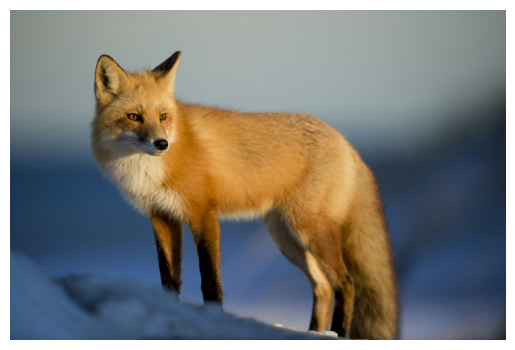

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.2].


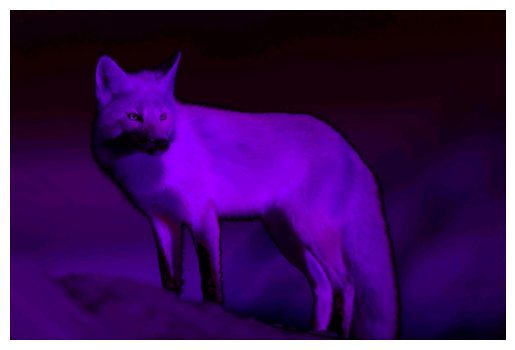

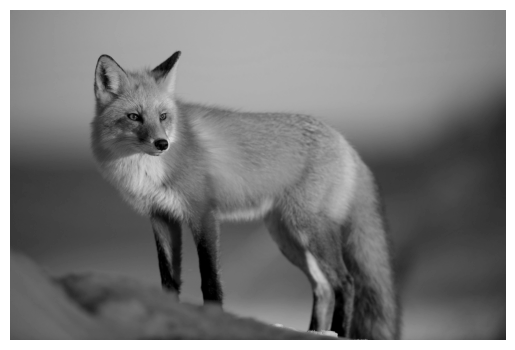

In [74]:
print("image shape :",images.shape)

plt.axis("off")
plt.imshow(images[0].permute(1,2,0).numpy().squeeze())
plt.show()
lab_images = rgb_to_lab(images)  # Convert to LAB
lab_visu = torch.abs(lab_images)
lab_visu[:,0] = lab_visu[:,1]
lab_visu[:,2] = lab_visu[:,2]
lab_visu[:,1] = 0
lab_visu*=2
plt.axis("off")
plt.imshow(lab_visu[0].permute(1,2,0).numpy().squeeze())
plt.show()
plt.axis("off")
plt.imshow(lab_images[0,0], cmap="grey")
plt.show()

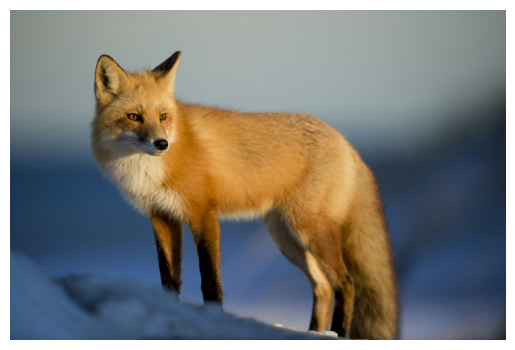

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.10000002..0.65686274].


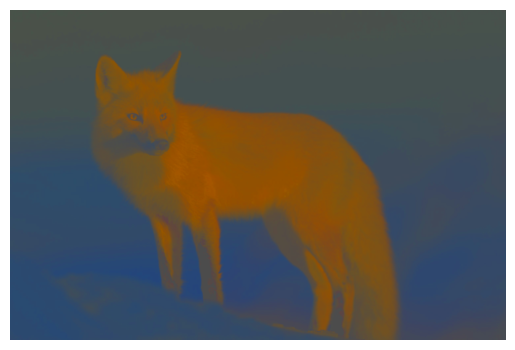

In [80]:
plt.axis("off")
plt.imshow(images[0].permute(1,2,0).numpy().squeeze())
plt.show()
lab_images = rgb_to_lab(images)  # Convert to LAB
lab_images[:,0] = 0.3
reconst = lab_to_rgb(lab_images)
plt.axis("off")
plt.imshow(reconst[0].permute(1,2,0).numpy().squeeze())
plt.show()